## Setting up dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('nyc-rolling-sales.csv')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


### Understanding data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

- We can see lot of numerical data fields like Sale Price, Sale Date, Land Sq Ft, Gross Sq Ft are in string format. 
- Categorical numerical fields should be string like Borough, Zipcode, Year Built as mathematical operations will not be performed on them

In [3]:
df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [4]:
df.shape

(84548, 22)

### Data Cleaning

In [5]:
df = df.drop_duplicates(df.columns, keep='last')
sum(df.duplicated(df.columns))

0

- Converting data types
- Dropping nulls
- This dataset also contains '-' values in fields. These do not come under Null values and must be cleaned appropriately

In [6]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], format='%Y-%m-%d %H:%M:%S')

In [7]:
df['SALE PRICE'] = df['SALE PRICE'].str.replace('-','')
df['SALE PRICE'] = df['SALE PRICE'].str.replace(' ','')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'])

df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].str.replace('-','')
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].str.replace(' ','')
df['LAND SQUARE FEET'] = pd.to_numeric(df['SALE PRICE'])

df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].str.replace('-','')
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].str.replace(' ','')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['SALE PRICE'])

df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,6625000.0,6625000.0,1900,2,C2,6625000.0,2017-07-19
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,NaN,NaN,1900,2,C7,NaN,2016-12-14
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,NaN,NaN,1900,2,C7,NaN,2016-12-09
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,3936272.0,3936272.0,1913,2,C4,3936272.0,2016-09-23
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,8000000.0,8000000.0,1900,2,C2,8000000.0,2016-11-17


In [8]:
df = df.dropna()
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,6625000.0,6625000.0,1900,2,C2,6625000.0,2017-07-19
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,3936272.0,3936272.0,1913,2,C4,3936272.0,2016-09-23
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,8000000.0,8000000.0,1900,2,C2,8000000.0,2016-11-17
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,3192840.0,3192840.0,1920,2,C4,3192840.0,2016-09-23
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,16232000.0,16232000.0,1920,2,D9,16232000.0,2016-11-07


- Converting Sale Date to datetime type
- Extracting day, month, year can be beneficial for further analysis

In [9]:
df['SALE DAY'] = df['SALE DATE'].dt.day_name()
df['SALE MONTH'] = df['SALE DATE'].dt.month_name()
df['SALE YEAR'] = df['SALE DATE'].dt.year
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE DAY,SALE MONTH,SALE YEAR
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,6625000.0,6625000.0,1900,2,C2,6625000.0,2017-07-19,Wednesday,July,2017
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,3936272.0,3936272.0,1913,2,C4,3936272.0,2016-09-23,Friday,September,2016
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,8000000.0,8000000.0,1900,2,C2,8000000.0,2016-11-17,Thursday,November,2016
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,3192840.0,3192840.0,1920,2,C4,3192840.0,2016-09-23,Friday,September,2016
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,16232000.0,16232000.0,1920,2,D9,16232000.0,2016-11-07,Monday,November,2016


### Cleaning - Initial Analysis

In [10]:
df['SALE PRICE'].value_counts()

0.0          10228
10.0           766
450000.0       427
550000.0       416
650000.0       414
             ...  
5260000.0        1
1448094.0        1
2127500.0        1
734750.0         1
1038348.0        1
Name: SALE PRICE, Length: 10007, dtype: int64

In [11]:
df = df[df['SALE PRICE'] > 0]

In [12]:
df['SALE PRICE'].skew()

114.98581979632326

-3.825390412742682


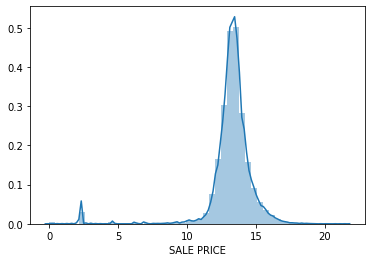

In [13]:
df_sales_Corrected = df['SALE PRICE']
df_sales_Corrected = np.log(df_sales_Corrected)
print(df_sales_Corrected.skew())

sns.distplot(df_sales_Corrected)

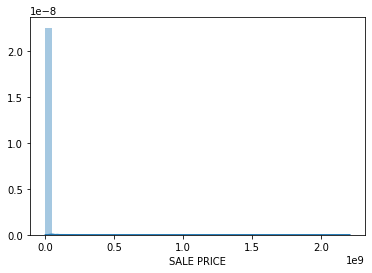

In [14]:
sns.distplot(df['SALE PRICE'])

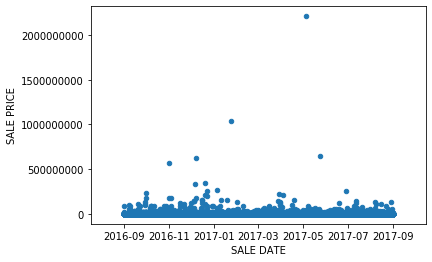

In [15]:
ax = df.plot.scatter(x='SALE DATE', y='SALE PRICE')
ax.ticklabel_format(style='plain', axis = 'y')

In [32]:
df = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 2000000)]
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE DAY,SALE MONTH,SALE YEAR
13,17,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",...,499000.0,499000.0,1920,2,C6,499000.0,2017-03-10,Friday,March,2017
15,19,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3RD STREET, 5A",...,529500.0,529500.0,1920,2,C6,529500.0,2017-06-09,Friday,June,2017
16,20,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 2E",...,423000.0,423000.0,1920,2,C6,423000.0,2017-07-14,Friday,July,2017
17,21,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,46,,C6,"317 EAST 3RD STREET, 12",...,501000.0,501000.0,1925,2,C6,501000.0,2017-03-16,Thursday,March,2017
18,22,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,49,,C6,"311 EAST 3RD STREET, 17",...,450000.0,450000.0,1920,2,C6,450000.0,2016-09-01,Thursday,September,2016


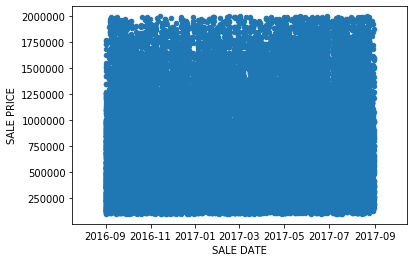

In [33]:
ax = df.plot.scatter(x='SALE DATE', y='SALE PRICE')
ax.ticklabel_format(style='plain', axis = 'y')

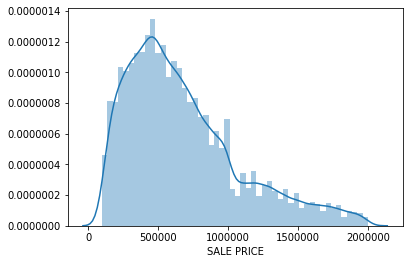

In [34]:
sns.distplot(df['SALE PRICE'])

- A pairplot helps establish relationships between variables initially without lot of analysis, visually

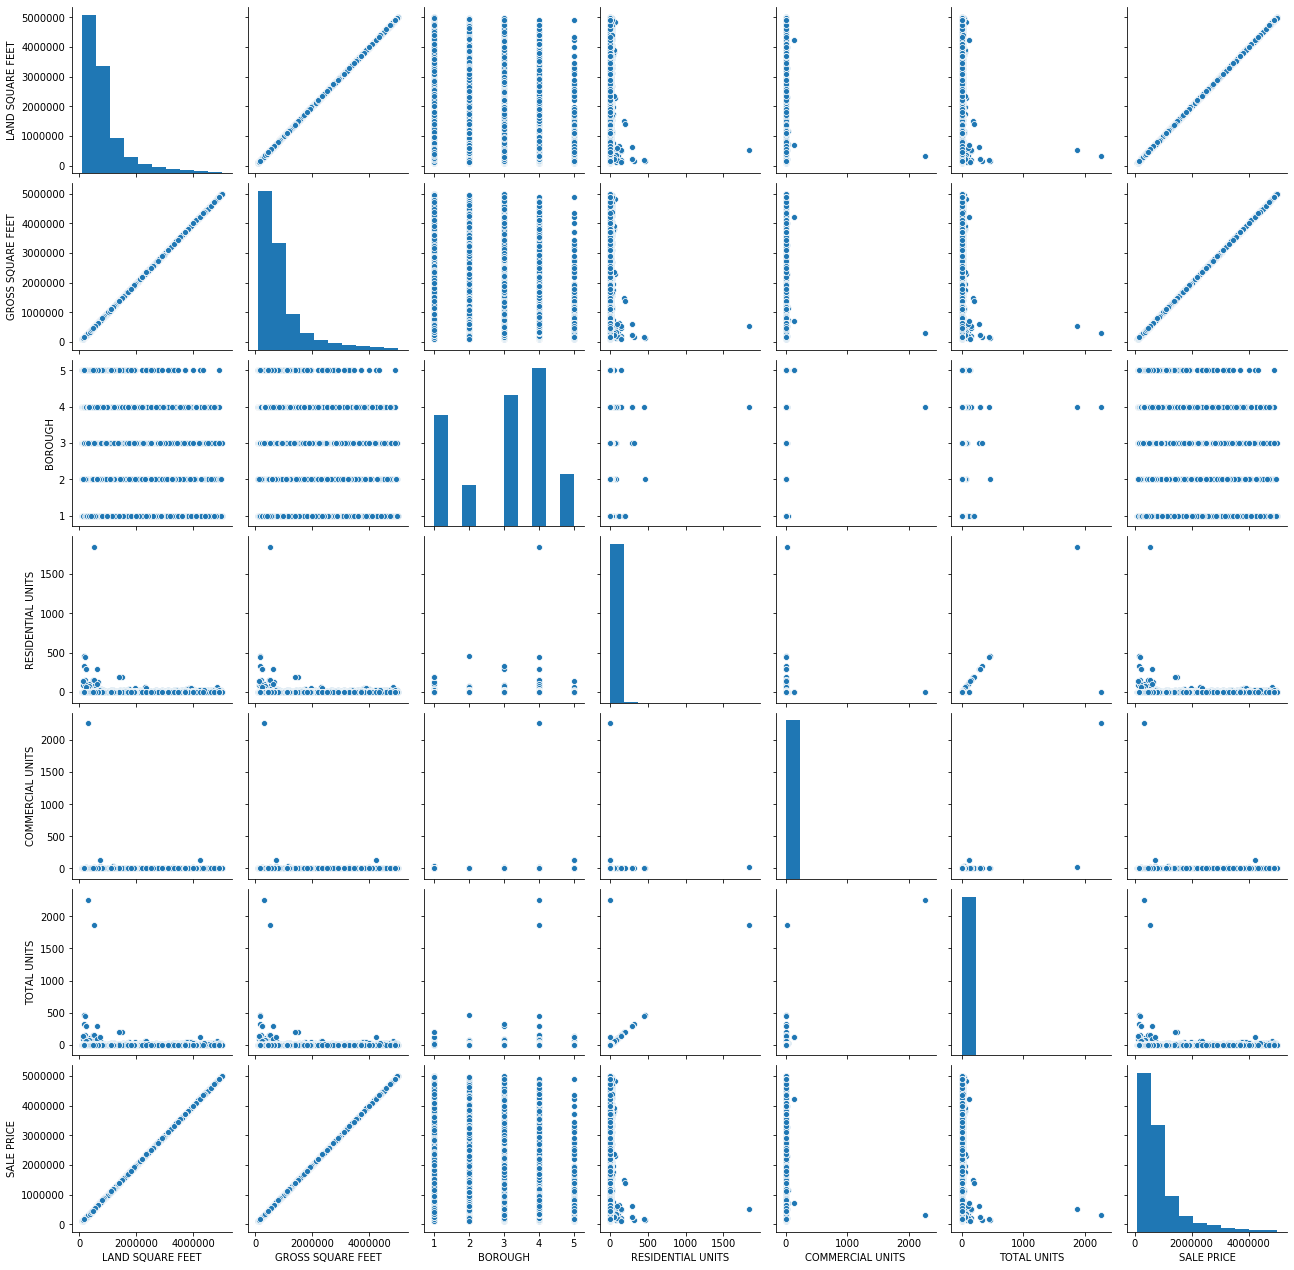

In [19]:
sns.pairplot(df[['LAND SQUARE FEET', 'GROSS SQUARE FEET','BOROUGH', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'SALE PRICE']])
plt.show()

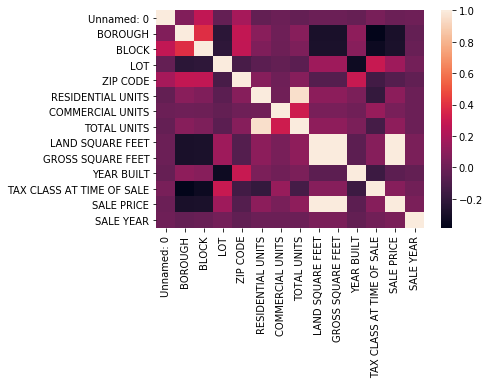

In [35]:
sns.heatmap(df.corr())

In [36]:
top_Prices = df[['NEIGHBORHOOD','SALE PRICE']].groupby(['NEIGHBORHOOD'], as_index=False).count().nlargest(10, 'SALE PRICE')
top_Prices_graph = df[['NEIGHBORHOOD','SALE PRICE']][df['NEIGHBORHOOD'].isin(top_Prices['NEIGHBORHOOD'])]

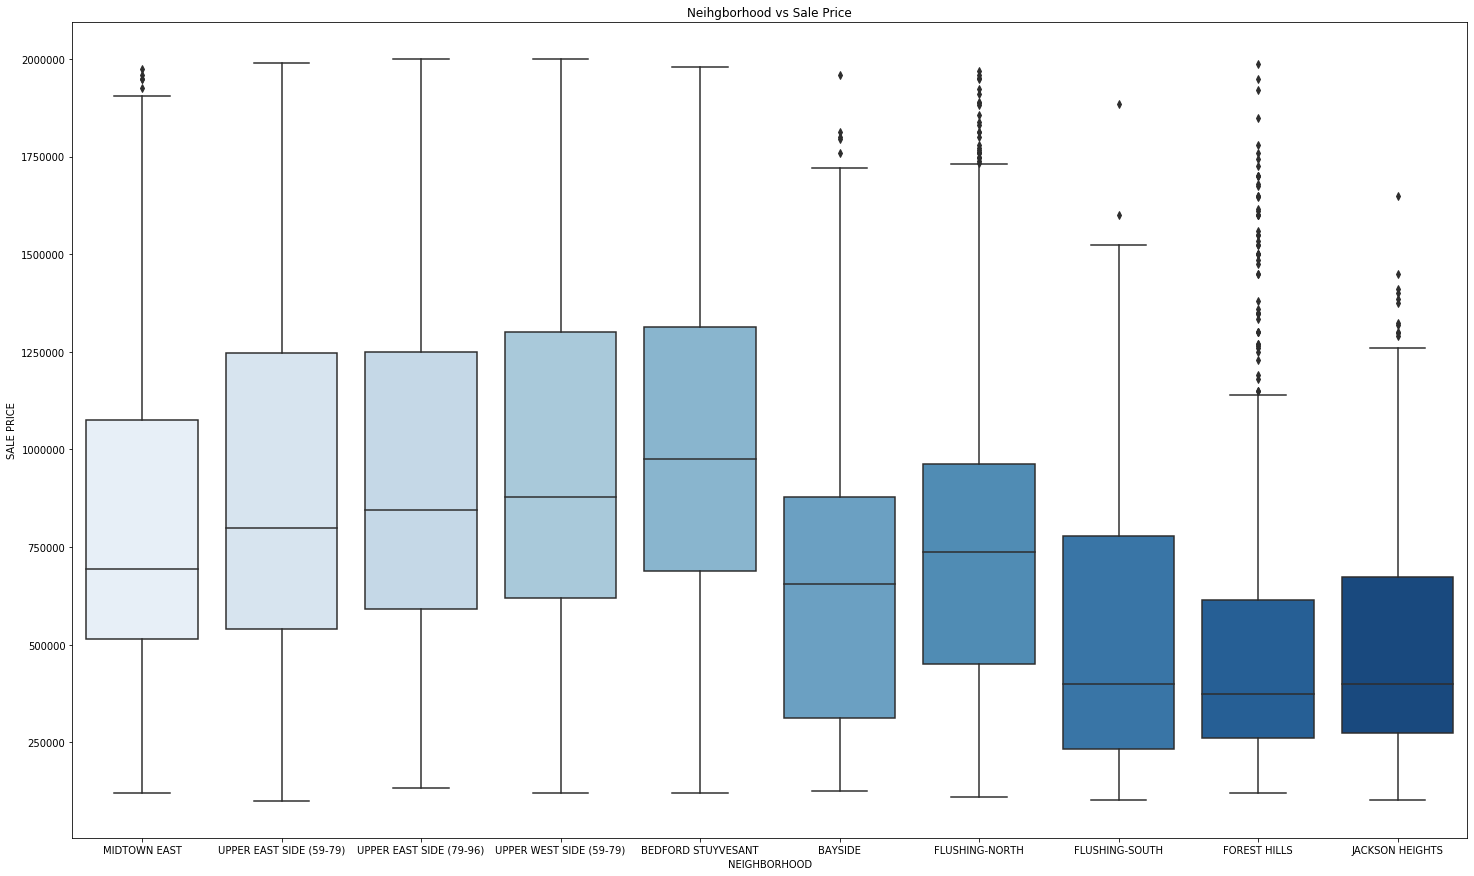

In [37]:
plt.figure(figsize=(25,15))
sns.boxplot(x = 'NEIGHBORHOOD' ,y='SALE PRICE', data=top_Prices_graph, palette="Blues")
plt.title('Neihgborhood vs Sale Price')
plt.show()

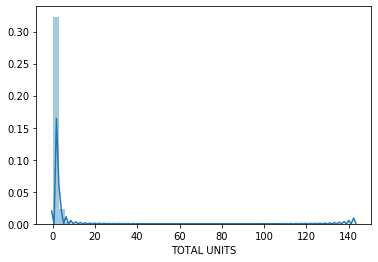

In [38]:
sns.distplot(df['TOTAL UNITS'])

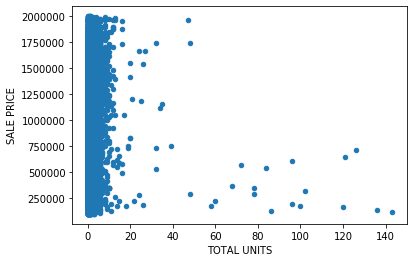

In [39]:
ax = df.plot.scatter(x='TOTAL UNITS', y='SALE PRICE')
ax.ticklabel_format(style='plain', axis = 'y')

In [46]:
df = df[(df['TOTAL UNITS'] < 150)]
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE DAY,SALE MONTH,SALE YEAR
13,17,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",...,499000.0,499000.0,1920,2,C6,499000.0,2017-03-10,Friday,March,2017
15,19,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3RD STREET, 5A",...,529500.0,529500.0,1920,2,C6,529500.0,2017-06-09,Friday,June,2017
16,20,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 2E",...,423000.0,423000.0,1920,2,C6,423000.0,2017-07-14,Friday,July,2017
17,21,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,46,,C6,"317 EAST 3RD STREET, 12",...,501000.0,501000.0,1925,2,C6,501000.0,2017-03-16,Thursday,March,2017
18,22,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,49,,C6,"311 EAST 3RD STREET, 17",...,450000.0,450000.0,1920,2,C6,450000.0,2016-09-01,Thursday,September,2016


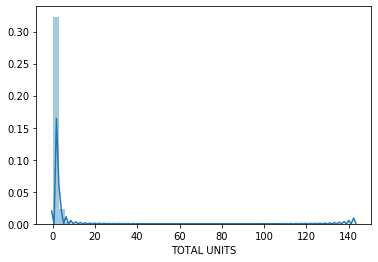

In [47]:
sns.distplot(df['TOTAL UNITS'])

In [57]:
top_Units = df[['TOTAL UNITS','SALE PRICE']].groupby(['TOTAL UNITS'], as_index=False).count().nlargest(50, 'SALE PRICE')
top_Units_graph = df[['TOTAL UNITS','SALE PRICE']][df['TOTAL UNITS'].isin(top_Units['TOTAL UNITS'])]

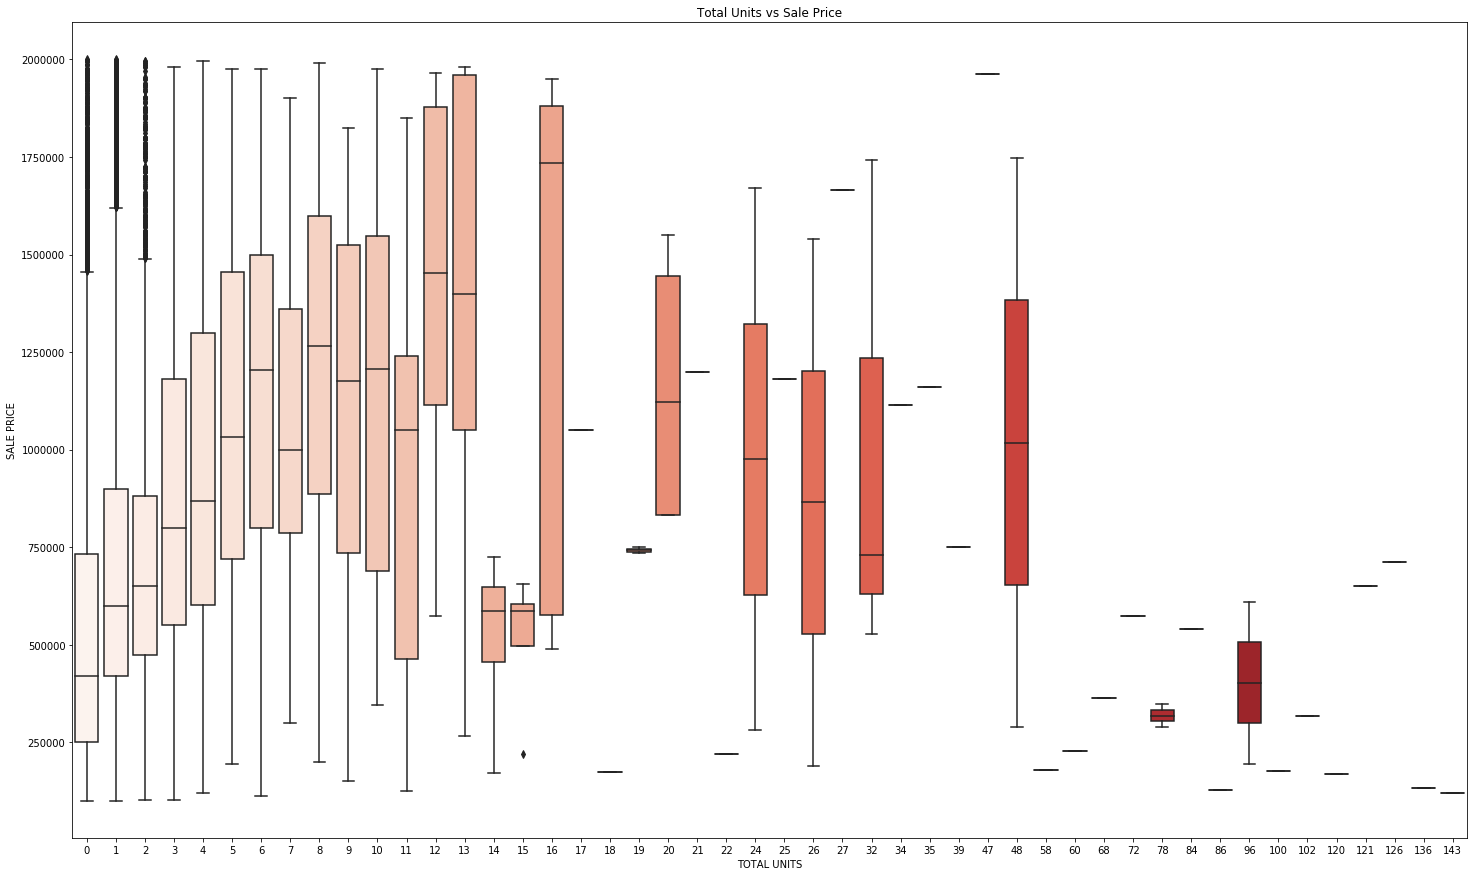

In [61]:
plt.figure(figsize=(25,15))
sns.boxplot(x = 'TOTAL UNITS', y ='SALE PRICE', data = top_Units_graph, palette="Reds")
plt.title('Total Units vs Sale Price')
plt.show()